In [1]:
import pandas as pd


df = pd.read_csv('crime.csv')

# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

# Handling missing values
print("\nHandling Missing Values:")
print("Number of missing values in each column:")
print(df.isnull().sum())

# Drop rows with missing values (you can choose a different strategy based on your dataset)
df = df.dropna()

# Dealing with outliers (you can choose a different strategy based on your dataset)
# For example, you can use z-scores to identify and remove outliers
z_scores = (df - df.mean()) / df.std()
df = df[(z_scores < 3).all(axis=1)]

# Display the first 10 records of the cleaned dataset
print("\nFirst 10 records of the cleaned dataset:")
print(df.head(10))

# Save the cleaned dataset to a new CSV file
cleaned_file_path = 'crimeclean.csv'
df.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to {cleaned_file_path}")


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Year                55 non-null     int64
 1   Population          55 non-null     int64
 2   Total               55 non-null     int64
 3   Violent             55 non-null     int64
 4   Property            55 non-null     int64
 5   Murder              55 non-null     int64
 6   Forcible_Rape       55 non-null     int64
 7   Robbery             55 non-null     int64
 8   Aggravated_assault  55 non-null     int64
 9   Burglary            55 non-null     int64
 10  Larceny_Theft       55 non-null     int64
 11  Vehicle_Theft       55 non-null     int64
dtypes: int64(12)
memory usage: 5.3 KB
None

Handling Missing Values:
Number of missing values in each column:
Year                  0
Population            0
Total                 0
Violent               0
Property   

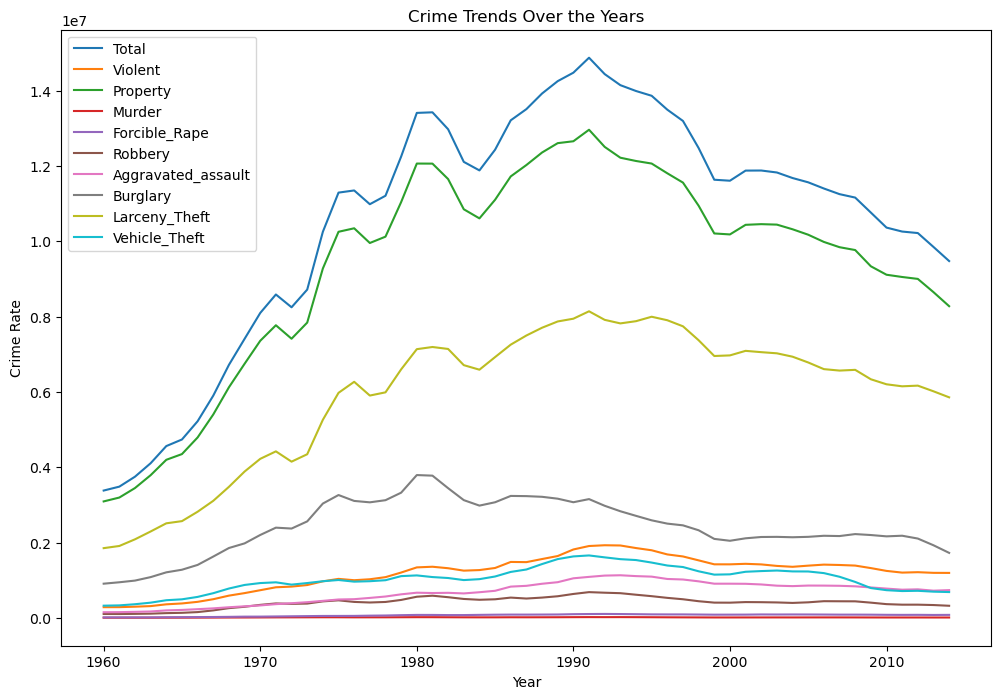

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
cleaned_file_path = 'crimeclean.csv'
df = pd.read_csv(cleaned_file_path)

# Assuming 'year' is the predictor variable and the crime categories are features
X = df[['Year']]
crime_categories = ['Total', 'Violent', 'Property', 'Murder', 'Forcible_Rape', 'Robbery',
                    'Aggravated_assault', 'Burglary', 'Larceny_Theft', 'Vehicle_Theft']

# Plot trends for each crime category
plt.figure(figsize=(12, 8))
for category in crime_categories:
    y = df[category]
    plt.plot(X, y, label=category)

plt.title('Crime Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Crime Rate')
plt.legend()
plt.show()


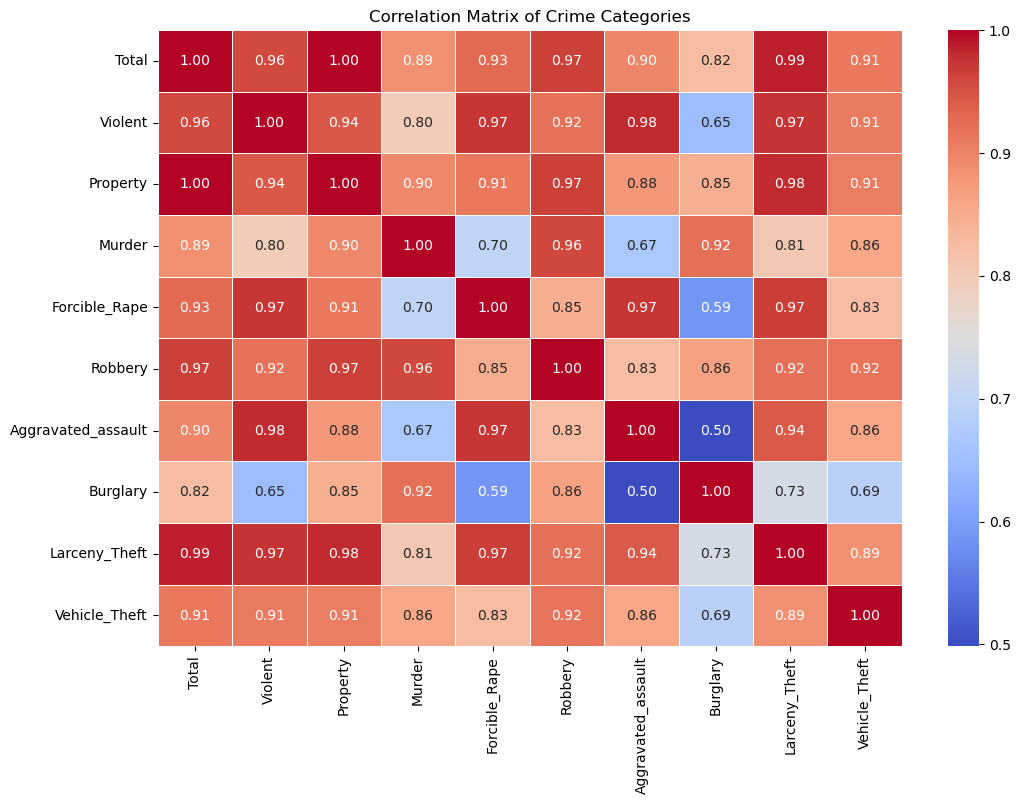

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
cleaned_file_path = 'crimeclean.csv'
df = pd.read_csv(cleaned_file_path)

# Assuming 'year' is the predictor variable and the crime categories are features
X = df[['Year']]
crime_categories = ['Total', 'Violent', 'Property', 'Murder', 'Forcible_Rape', 'Robbery',
                    'Aggravated_assault', 'Burglary', 'Larceny_Theft', 'Vehicle_Theft']

# Compute the correlation matrix
correlation_matrix = df[crime_categories].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Crime Categories')
plt.show()


In [4]:
import pandas as pd
from scipy.stats import zscore

# Load the cleaned dataset
cleaned_file_path = 'crimeclean.csv'
df = pd.read_csv(cleaned_file_path)

# Assuming 'year' is the predictor variable and the crime categories are features
X = df[['Year']]
crime_categories = ['Total', 'Violent', 'Property', 'Murder', 'Forcible_Rape', 'Robbery',
                    'Aggravated_assault', 'Burglary', 'Larceny_Theft', 'Vehicle_Theft']

# Calculate z-scores for each crime category
z_scores = zscore(df[crime_categories])

# Set a threshold for z-scores to identify anomalies
threshold = 3

# Identify anomalies for each crime category
anomalies = pd.DataFrame(data=(z_scores > threshold), columns=crime_categories)

# Display anomalies
print("Anomalies in the dataset:")
print(anomalies)


Anomalies in the dataset:
    Total  Violent  Property  Murder  Forcible_Rape  Robbery  \
0   False    False     False   False          False    False   
1   False    False     False   False          False    False   
2   False    False     False   False          False    False   
3   False    False     False   False          False    False   
4   False    False     False   False          False    False   
5   False    False     False   False          False    False   
6   False    False     False   False          False    False   
7   False    False     False   False          False    False   
8   False    False     False   False          False    False   
9   False    False     False   False          False    False   
10  False    False     False   False          False    False   
11  False    False     False   False          False    False   
12  False    False     False   False          False    False   
13  False    False     False   False          False    False   
14  False    F

First 10 records of the dataset:
   Year  Population    Total  Violent  Property  Murder  Forcible_Rape  \
0  1960   179323175  3384200   288460   3095700    9110          17190   
1  1961   182992000  3488000   289390   3198600    8740          17220   
2  1962   185771000  3752200   301510   3450700    8530          17550   
3  1963   188483000  4109500   316970   3792500    8640          17650   
4  1964   191141000  4564600   364220   4200400    9360          21420   
5  1965   193526000  4739400   387390   4352000    9960          23410   
6  1966   195576000  5223500   430180   4793300   11040          25820   
7  1967   197457000  5903400   499930   5403500   12240          27620   
8  1968   199399000  6720200   595010   6125200   13800          31670   
9  1969   201385000  7410900   661870   6749000   14760          37170   

   Robbery  Aggravated_assault  Burglary  Larceny_Theft  Vehicle_Theft  
0   107840              154320    912100        1855400         328200  
1   10

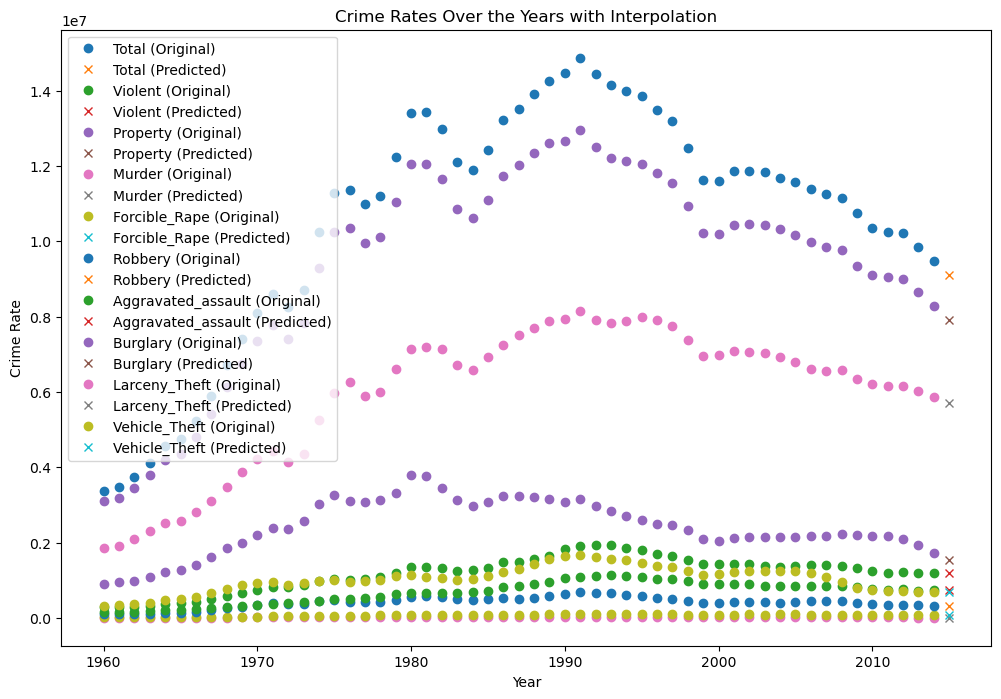

In [5]:
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Load the cleaned dataset
cleaned_file_path = 'crimeclean.csv'
df = pd.read_csv(cleaned_file_path)

# Display the first 10 records of the dataset
print("First 10 records of the dataset:")
print(df.head(10))

# Display the last 10 records of the dataset
print("\nLast 10 records of the dataset:")
print(df.tail(10))

# Assuming 'year' is the predictor variable and the crime categories are features
X = df['Year']
crime_categories = ['Total', 'Violent', 'Property', 'Murder', 'Forcible_Rape', 'Robbery',
                    'Aggravated_assault', 'Burglary', 'Larceny_Theft', 'Vehicle_Theft']

# Ask the user for a year to predict
input_year = int(input("Enter the year for crime rate prediction: "))

# Interpolate values for each crime category based on the input year
predicted_values = {}
for category in crime_categories:
    y = df[category]
    interpolator = interp1d(X, y, kind='linear', fill_value='extrapolate')
    predicted_value = interpolator(input_year)
    predicted_values[category] = predicted_value

# Display the predicted values for each crime category
print(f'\nPredicted Crime Rates for the Year {input_year}:')
for category, value in predicted_values.items():
    print(f'{category}: {value:.2f}')

# Plot the original data and the interpolated values
plt.figure(figsize=(12, 8))
for category in crime_categories:
    plt.plot(X, df[category], 'o', label=f'{category} (Original)')
    plt.plot(input_year, predicted_values[category], 'x', label=f'{category} (Predicted)')

plt.title('Crime Rates Over the Years with Interpolation')
plt.xlabel('Year')
plt.ylabel('Crime Rate')
plt.legend()
plt.show()


First 10 records of the dataset:
   Year  Population    Total  Violent  Property  Murder  Forcible_Rape  \
0  1960   179323175  3384200   288460   3095700    9110          17190   
1  1961   182992000  3488000   289390   3198600    8740          17220   
2  1962   185771000  3752200   301510   3450700    8530          17550   
3  1963   188483000  4109500   316970   3792500    8640          17650   
4  1964   191141000  4564600   364220   4200400    9360          21420   
5  1965   193526000  4739400   387390   4352000    9960          23410   
6  1966   195576000  5223500   430180   4793300   11040          25820   
7  1967   197457000  5903400   499930   5403500   12240          27620   
8  1968   199399000  6720200   595010   6125200   13800          31670   
9  1969   201385000  7410900   661870   6749000   14760          37170   

   Robbery  Aggravated_assault  Burglary  Larceny_Theft  Vehicle_Theft  
0   107840              154320    912100        1855400         328200  
1   10

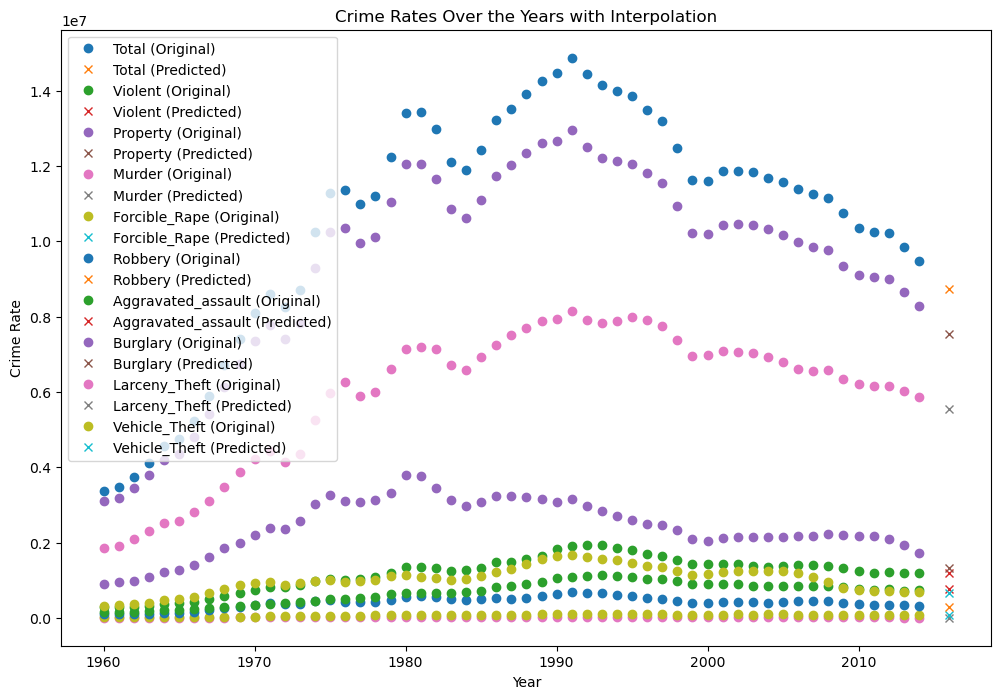

In [7]:
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Load the cleaned dataset
cleaned_file_path = 'crimeclean.csv'
df = pd.read_csv(cleaned_file_path)

# Display the first 10 records of the dataset
print("First 10 records of the dataset:")
print(df.head(10))

# Display the last 10 records of the dataset
print("\nLast 10 records of the dataset:")
print(df.tail(10))

# Assuming 'year' is the predictor variable and the crime categories are features
X = df['Year']
crime_categories = ['Total', 'Violent', 'Property', 'Murder', 'Forcible_Rape', 'Robbery',
                    'Aggravated_assault', 'Burglary', 'Larceny_Theft', 'Vehicle_Theft']

# Ask the user for a year to predict
input_year = int(input("Enter the year for crime rate prediction: "))

# Interpolate values for each crime category based on the input year
predicted_values = {}
for category in crime_categories:
    y = df[category]
    interpolator = interp1d(X, y, kind='linear', fill_value='extrapolate')
    predicted_value = interpolator(input_year)
    predicted_values[category] = predicted_value

# Display the predicted values for each crime category
print(f'\nPredicted Crime Rates for the Year {input_year}:')
for category, value in predicted_values.items():
    print(f'{category}: {value:.2f}')

# Plot the original data and the interpolated values
plt.figure(figsize=(12, 8))
for category in crime_categories:
    plt.plot(X, df[category], 'o', label=f'{category} (Original)')
    plt.plot(input_year, predicted_values[category], 'x', label=f'{category} (Predicted)')

plt.title('Crime Rates Over the Years with Interpolation')
plt.xlabel('Year')
plt.ylabel('Crime Rate')
plt.legend()
plt.show()


First 10 records of the dataset:
   Year  Population    Total  Violent  Property  Murder  Forcible_Rape  \
0  1960   179323175  3384200   288460   3095700    9110          17190   
1  1961   182992000  3488000   289390   3198600    8740          17220   
2  1962   185771000  3752200   301510   3450700    8530          17550   
3  1963   188483000  4109500   316970   3792500    8640          17650   
4  1964   191141000  4564600   364220   4200400    9360          21420   
5  1965   193526000  4739400   387390   4352000    9960          23410   
6  1966   195576000  5223500   430180   4793300   11040          25820   
7  1967   197457000  5903400   499930   5403500   12240          27620   
8  1968   199399000  6720200   595010   6125200   13800          31670   
9  1969   201385000  7410900   661870   6749000   14760          37170   

   Robbery  Aggravated_assault  Burglary  Larceny_Theft  Vehicle_Theft  
0   107840              154320    912100        1855400         328200  
1   10

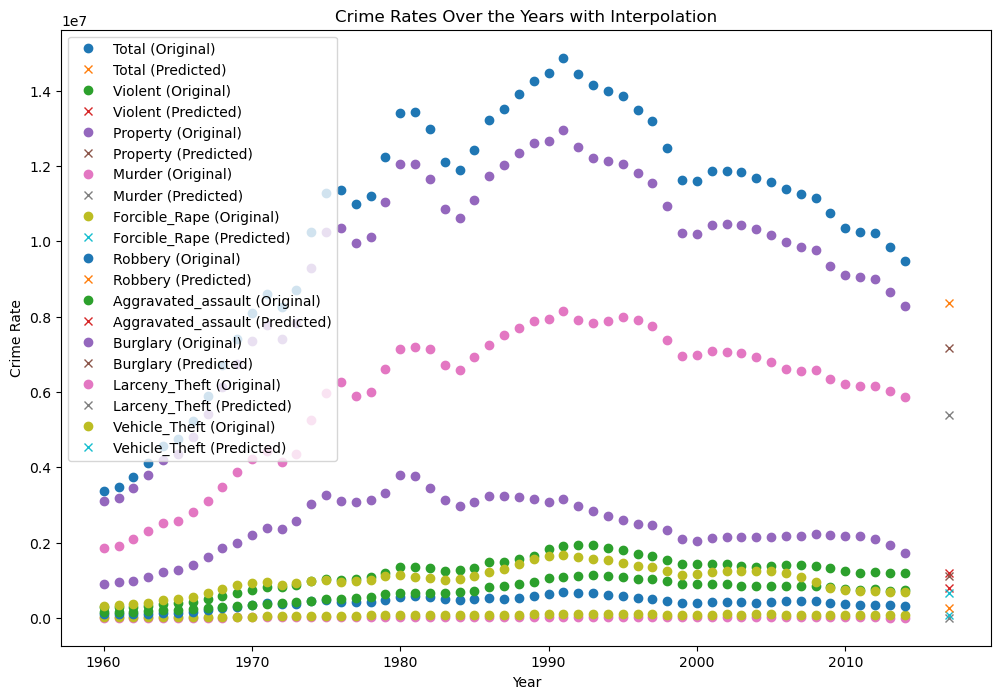

In [8]:
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Load the cleaned dataset
cleaned_file_path = 'crimeclean.csv'
df = pd.read_csv(cleaned_file_path)

# Display the first 10 records of the dataset
print("First 10 records of the dataset:")
print(df.head(10))

# Display the last 10 records of the dataset
print("\nLast 10 records of the dataset:")
print(df.tail(10))

# Assuming 'year' is the predictor variable and the crime categories are features
X = df['Year']
crime_categories = ['Total', 'Violent', 'Property', 'Murder', 'Forcible_Rape', 'Robbery',
                    'Aggravated_assault', 'Burglary', 'Larceny_Theft', 'Vehicle_Theft']

# Ask the user for a year to predict
input_year = int(input("Enter the year for crime rate prediction: "))

# Interpolate values for each crime category based on the input year
predicted_values = {}
for category in crime_categories:
    y = df[category]
    interpolator = interp1d(X, y, kind='linear', fill_value='extrapolate')
    predicted_value = interpolator(input_year)
    predicted_values[category] = predicted_value

# Display the predicted values for each crime category
print(f'\nPredicted Crime Rates for the Year {input_year}:')
for category, value in predicted_values.items():
    print(f'{category}: {value:.2f}')

# Plot the original data and the interpolated values
plt.figure(figsize=(12, 8))
for category in crime_categories:
    plt.plot(X, df[category], 'o', label=f'{category} (Original)')
    plt.plot(input_year, predicted_values[category], 'x', label=f'{category} (Predicted)')

plt.title('Crime Rates Over the Years with Interpolation')
plt.xlabel('Year')
plt.ylabel('Crime Rate')
plt.legend()
plt.show()


In [9]:
import pandas as pd
from scipy.stats import zscore
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Load the cleaned dataset
cleaned_file_path = 'crimeclean.csv'
df = pd.read_csv(cleaned_file_path)

# Assuming 'year' is the predictor variable and the crime categories are features
X = df['Year']
crime_categories = ['Total', 'Violent', 'Property', 'Murder', 'Forcible_Rape', 'Robbery',
                    'Aggravated_assault', 'Burglary', 'Larceny_Theft', 'Vehicle_Theft']

# Ask the user for a year to predict
input_year = int(input("Enter the year for crime rate prediction: "))

# Interpolate values for each crime category based on the input year
predicted_values = {}
for category in crime_categories:
    y = df[category]
    interpolator = interp1d(X, y, kind='linear', fill_value='extrapolate')
    predicted_value = interpolator(input_year)
    predicted_values[category] = predicted_value

# Display the predicted values for each crime category
print(f'\nPredicted Crime Rates for the Year {input_year}:')
for category, value in predicted_values.items():
    print(f'{category}: {value:.2f}')

# Check if predicted crime rates are greater than the average
average_crime_rates = df[crime_categories].mean()
alert_categories = [category for category, value in predicted_values.items() if value > average_crime_rates[category]]

# Alert mechanism
if alert_categories:
    print("\nAlert: Increase law enforcement in the following categories:")
    for category in alert_categories:
        print(f'- {category}')
else:
    print("\nNo alert needed. Predicted crime rates are not above the average.")


Enter the year for crime rate prediction: 2018

Predicted Crime Rates for the Year 2018:
Total: 7977300.00
Violent: 1191199.00
Property: 6786101.00
Murder: 13969.00
Forcible_Rape: 91769.00
Robbery: 248630.00
Aggravated_assault: 800155.00
Burglary: 921690.00
Larceny_Theft: 5217952.00
Vehicle_Theft: 646459.00

Alert: Increase law enforcement in the following categories:
- Violent
- Forcible_Rape
- Aggravated_assault
